# Data Analysis and Visualization Project

## Phase 1: Project Proposal

### **Loading dataset and Merging**

In [ ]:
import pandas as pd

working_path = "/kaggle/input/brazilian-ecommerce/"

orders_df = pd.read_csv(working_path + "olist_orders_dataset.csv",
                        usecols=["order_id", "customer_id", "order_status",
                                 "order_purchase_timestamp", "order_delivered_customer_date"],
                        on_bad_lines="skip")

customers_df = pd.read_csv(working_path + "olist_customers_dataset.csv",
                           usecols=["customer_id", "customer_city"],
                           on_bad_lines="skip")

order_items_df = pd.read_csv(working_path + "olist_order_items_dataset.csv",
                             usecols=["order_id", "product_id", "seller_id", "price"],
                             on_bad_lines="skip")

products_df = pd.read_csv(working_path + "olist_products_dataset.csv",
                          usecols=["product_id", "product_category_name"],
                          on_bad_lines="skip")

translation_df = pd.read_csv(working_path + "product_category_name_translation.csv",
                             usecols=["product_category_name", "product_category_name_english"],
                             on_bad_lines="skip")

sellers_df = pd.read_csv(working_path + "olist_sellers_dataset.csv",
                         usecols=["seller_id", "seller_city", "seller_state"],
                         on_bad_lines="skip")

payments_df = pd.read_csv(working_path + "olist_order_payments_dataset.csv",
                          usecols=["order_id", "payment_type", "payment_value"],
                          on_bad_lines="skip")

reviews_df = pd.read_csv(working_path + "olist_order_reviews_dataset.csv",
                         usecols=["order_id", "review_score", "review_comment_title",
                                  "review_comment_message", "review_creation_date"],
                         on_bad_lines="skip")

merged_df = orders_df.merge(customers_df, on="customer_id", how="left")

merged_df = merged_df.merge(order_items_df, on="order_id", how="left")

merged_df = merged_df.merge(products_df, on="product_id", how="left")

merged_df = merged_df.merge(translation_df, on="product_category_name", how="left")

merged_df = merged_df.merge(sellers_df, on="seller_id", how="left")

merged_df = merged_df.merge(payments_df, on="order_id", how="left")

merged_df = merged_df.merge(reviews_df, on="order_id", how="left")

merged_df.drop(columns=["product_category_name"], inplace=True)

final_csv_path = "/kaggle/working/final_merged_dataset.csv"
merged_df.to_csv(final_csv_path, index=False)

In [ ]:
df=pd.read_csv("/kaggle/working/final_merged_dataset.csv")

In [ ]:
import pandas as pd

file_path = "/kaggle/working/final_merged_dataset.csv"
df = pd.read_csv(file_path)

columns_to_remove = [0, 1, 6,7]

df.drop(df.columns[columns_to_remove], axis=1, inplace=True)

df.to_csv("/kaggle/working/cleaned_dataset.csv", index=False)

In [ ]:
df=pd.read_csv("/kaggle/working/cleaned_dataset.csv")

In [ ]:
column_order=["customer_city","seller_city","seller_state","product_category_name_english","price","payment_value","payment_type","order_status","order_purchase_timestamp","order_delivered_customer_date","review_score","review_comment_title","review_comment_message","review_creation_date"]

In [ ]:
df = df[column_order]

In [ ]:
df

[Summary: DataFrame with 119143 rows and 14 columns: customer_city, seller_city, seller_state, product_category_name_english, price, payment_value, payment_type, order_status, order_purchase_timestamp, order_delivered_customer_date, review_score, review_comment_title, review_comment_message, review_creation_date]

In [ ]:
df.to_csv("/kaggle/working/14column.csv")

In [1]:
df.describe()

In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator
file_path = "/kaggle/working/14column.csv"
df = pd.read_csv(file_path)
translator = GoogleTranslator(source='pt', target='en')
def translate_text(text):
    if pd.isna(text):
        return text
    try:
        return translator.translate(text)
    except Exception as e:
        print(f"Error translating: {text} -> {e}")
        return text
df['review_comment_message'][1000:10000] = df['review_comment_message'][1000:10000].apply(translate_text)
df.to_csv("/kaggle/input/dataset/FINAL.csv", index=False)

## Phase 2: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/FINAL (1).csv')

In [2]:
df.describe()

Unnamed: 0          price  payment_value   review_score
count  119143.000000  118310.000000  119140.000000  118146.000000
mean    59571.000000     120.646603     172.735135       4.015582
std     34393.765898     184.109691     267.776077       1.400436
min         0.000000       0.850000       0.000000       1.000000
25%     29785.500000      39.900000      60.850000       4.000000
50%     59571.000000      74.900000     108.160000       5.000000
75%     89356.500000     134.900000     189.240000       5.000000
max    119142.000000    6735.000000   13664.080000       5.000000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     119143 non-null  int64  
 1   customer_city                  119143 non-null  object 
 2   seller_city                    118310 non-null  object 
 3   seller_state                   118310 non-null  object 
 4   product_category_name_english  116576 non-null  object 
 5   price                          118310 non-null  float64
 6   payment_value                  119140 non-null  float64
 7   payment_type                   119140 non-null  object 
 8   order_status                   119143 non-null  object 
 9   order_purchase_timestamp       119143 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  review_score                   118146 non-null  float64
 12  review_comment_title          

What is the effect of review length on customer sentiment and review scores in Brazilian e-commerce, and how can this relationship inform strategies to encourage more informative customer feedback?

In [4]:
df.describe()

Unnamed: 0          price  payment_value   review_score
count  119143.000000  118310.000000  119140.000000  118146.000000
mean    59571.000000     120.646603     172.735135       4.015582
std     34393.765898     184.109691     267.776077       1.400436
min         0.000000       0.850000       0.000000       1.000000
25%     29785.500000      39.900000      60.850000       4.000000
50%     59571.000000      74.900000     108.160000       5.000000
75%     89356.500000     134.900000     189.240000       5.000000
max    119142.000000    6735.000000   13664.080000       5.000000

In [5]:
df.head()

Unnamed: 0 customer_city     seller_city seller_state  \
0           0     São Paulo            maua           SP   
1           1     São Paulo            maua           SP   
2           2     São Paulo            maua           SP   
3           3      barriers  belo horizonte           SP   
4           4    VIANOPOLIS         guariba           SP   

  product_category_name_english   price  payment_value payment_type  \
0                    housewares   29.99          18.12  credit_card   
1                    housewares   29.99           2.00      voucher   
2                    housewares   29.99          18.59      voucher   
3                     perfumery  118.70         141.46       boleto   
4                          auto  159.90         179.12  credit_card   

  order_status order_purchase_timestamp order_delivered_customer_date  \
0    delivered          10/2/2017 10:56              10/10/2017 21:25   
1    delivered          10/2/2017 10:56              10/10/2017 21:25   
2    delivered          10/2/2017 10:56              10/10/2017 21:25   
3    delivered          7/24/2018 20:41                8/7/2018 15:27   
4    delivered            8/8/2018 8:38               8/17/2018 18:06   

   review_score review_comment_title  \
0           4.0                  NaN   
1           4.0                  NaN   
2           4.0                  NaN   
3           4.0      Very good store   
4           5.0                  NaN   

                              review_comment_message review_creation_date  
0  I haven't tested the product yet, but it came ...      10/11/2017 0:00  
1  I haven't tested the product yet, but it came ...      10/11/2017 0:00  
2  I haven't tested the product yet, but it came ...      10/11/2017 0:00  
3                                 Very good product.        8/8/2018 0:00  
4                                                NaN       8/18/2018 0:00

In [6]:
df.sample(5)

Unnamed: 0   customer_city  seller_city seller_state  \
88419        88419       sao paulo  santo andre           SP   
18522        18522     divinopolis     valinhos           SP   
42276        42276       sao paulo    sao paulo           SP   
93453        93453        louveira     ibitinga           SP   
117144      117144  ribeirao preto   piracicaba           SP   

       product_category_name_english   price  payment_value payment_type  \
88419                  health_beauty   23.99          31.77  credit_card   
18522                      perfumery   45.90         122.00       boleto   
42276          computers_accessories   29.90          39.24  credit_card   
93453                 bed_bath_table  109.90         222.42  credit_card   
117144                bed_bath_table  219.90         238.15  credit_card   

       order_status order_purchase_timestamp order_delivered_customer_date  \
88419     delivered         11/28/2017 13:47               12/4/2017 19:32   
18522     delivered          8/27/2017 18:32                9/8/2017 18:19   
42276     delivered          7/17/2017 22:52               7/20/2017 11:06   
93453     delivered          4/18/2017 16:12                4/28/2017 9:44   
117144    delivered         10/14/2017 14:40              10/20/2017 21:56   

        review_score review_comment_title  \
88419            5.0                  NaN   
18522            5.0                  NaN   
42276            5.0                  NaN   
93453            5.0                  NaN   
117144           5.0                  NaN   

                                   review_comment_message review_creation_date  
88419                                                 NaN       12/5/2017 0:00  
18522   The only thing is the bill to be paid only at ...        9/9/2017 0:00  
42276                                                 NaN       7/21/2017 0:00  
93453                                                 NaN       4/29/2017 0:00  
117144                                                NaN      10/21/2017 0:00

In [7]:
df.tail()

Unnamed: 0 customer_city seller_city seller_state  \
119138      119138  praia grande        tupa           SP   
119139      119139   nova vicosa   sao paulo           SP   
119140      119140       japuiba    ilicinea           MG   
119141      119141       japuiba    ilicinea           MG   
119142      119142          lapa      franca           SP   

       product_category_name_english   price  payment_value payment_type  \
119138                          baby  174.90         195.00  credit_card   
119139             home_appliances_2  205.99         271.01  credit_card   
119140         computers_accessories  179.99         441.16  credit_card   
119141         computers_accessories  179.99         441.16  credit_card   
119142                 health_beauty   68.50          86.86   debit_card   

       order_status order_purchase_timestamp order_delivered_customer_date  \
119138    delivered           2/6/2018 12:58               2/28/2018 17:37   
119139    delivered          8/27/2017 14:46               9/21/2017 11:24   
119140    delivered           1/8/2018 21:28               1/25/2018 23:32   
119141    delivered           1/8/2018 21:28               1/25/2018 23:32   
119142    delivered           3/8/2018 20:57               3/16/2018 13:08   

        review_score review_comment_title  \
119138           4.0                  NaN   
119139           5.0                  NaN   
119140           2.0                  NaN   
119141           2.0                  NaN   
119142           5.0                  NaN   

                                   review_comment_message review_creation_date  
119138        Just a piece that came cracked but okay lol        3/1/2018 0:00  
119139              It was delivered before the deadline.       9/22/2017 0:00  
119140  It was delivered only 1. I want to know about ...       1/26/2018 0:00  
119141  It was delivered only 1. I want to know about ...       1/26/2018 0:00  
119142                                                NaN       3/17/2018 0:00

In [9]:
import pandas as pd
import plotly.express as px

review_col = 'review_comment_message'
rating_col = 'review_score'

df = df.dropna(subset=[review_col, rating_col])
df['review_length'] = df[review_col].apply(lambda x: len(str(x).split()))
df[rating_col] = df[rating_col].astype(str)

fig = px.box(
    df,
    x=rating_col,
    y='review_length',
    color=rating_col,
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Effect of Review Length on Customer Sentiment (Rating)',
    labels={
        rating_col: 'Rating Score',
        'review_length': 'Review Length (Number of Words)'
    },
    points="outliers"
)

fig.update_layout(
    xaxis_title='Rating Score',
    yaxis_title='Review Length (Number of Words)',
    showlegend=False,
    template='plotly_white'
)

fig.show()


How does the timing of review creation (e.g., delay between purchase and review) influence review scores and customer satisfaction in e-commerce, and what operational changes can mitigate negative impacts of delayed reviews?

In [11]:
import pandas as pd
import plotly.express as px

df = df.dropna(subset=['order_purchase_timestamp', 'review_creation_date', 'review_score'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_delay_days'] = (df['review_creation_date'] - df['order_purchase_timestamp']).dt.days
df = df[df['review_delay_days'] >= 0]

bins = [-1, 0, 3, 7, 14]
labels = ['Same Day', '1–3 Days', '4–7 Days', '8–14 Days']
df['delay_category'] = pd.cut(df['review_delay_days'], bins=bins, labels=labels)
df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')


grouped = df.groupby('delay_category', observed=True)['review_score'].mean().reset_index()

fig = px.bar(
    grouped,
    x='delay_category',
    y='review_score',
    text='review_score',
    color='delay_category',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Average Review Score by Review Delay',
    labels={
        'delay_category': 'Delay Between Purchase and Review',
        'review_score': 'Average Review Score'
    }
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis_title='Delay Between Purchase and Review',
    yaxis_title='Average Review Score',
    showlegend=False,
    template='plotly_white'
)

fig.show()


In [12]:
import pandas as pd
import plotly.express as px

df = df.dropna(subset=['seller_state', 'review_score', 'price'])
df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

state_grouped = df.groupby('seller_state').agg({
    'review_score': 'mean',
    'price': 'sum',
    'Unnamed: 0': 'count'
}).reset_index().rename(columns={'Unnamed: 0': 'order_count'})

state_grouped = state_grouped.sort_values(by='review_score', ascending=False)

fig = px.bar(
    state_grouped,
    x='seller_state',
    y='price',
    color='price',
    text='price',
    title='Total Sales by State',
    labels={
        'seller_state': 'State',
        'price': 'Total Sales (R$)'
    },
    color_continuous_scale='viridis'
)

fig.update_traces(texttemplate='R$%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Total Sales (R$)',
    template='plotly_white'
)

fig.show()


<ipython-input-12-c853d9904234>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-c853d9904234>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
import pandas as pd
import plotly.express as px

df = df.dropna(subset=['payment_type'])
payment_counts = df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']

fig = px.pie(
    payment_counts,
    names='payment_type',
    values='count',
    title='Payment Type Distribution',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    pull=[0.05] * len(payment_counts)
)

fig.update_layout(
    showlegend=True,
    legend_title='Payment Types',
    template='plotly_white'
)

fig.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49512 entries, 0 to 119141
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     49512 non-null  int64         
 1   customer_city                  49512 non-null  object        
 2   seller_city                    49512 non-null  object        
 3   seller_state                   49512 non-null  object        
 4   product_category_name_english  48743 non-null  object        
 5   price                          49512 non-null  float64       
 6   payment_value                  49509 non-null  float64       
 7   payment_type                   49509 non-null  object        
 8   order_status                   49512 non-null  object        
 9   order_purchase_timestamp       49512 non-null  datetime64[ns]
 10  order_delivered_customer_date  47933 non-null  object        
 11  review_score       

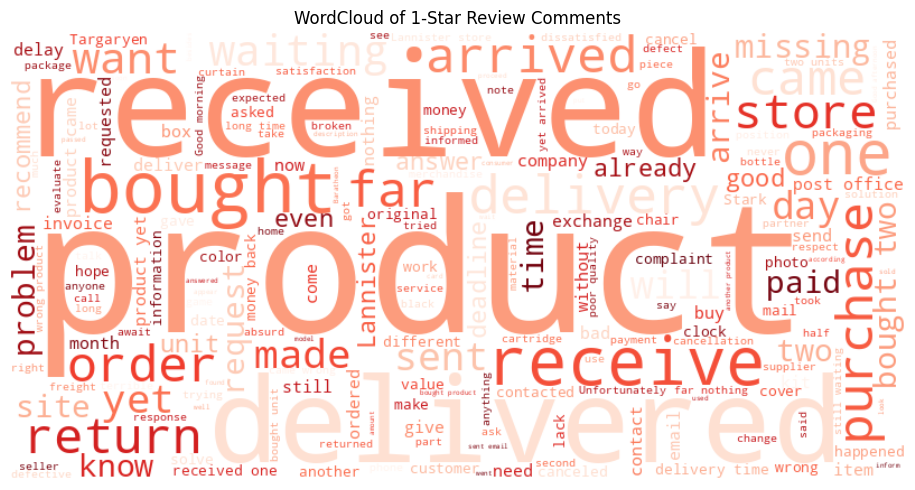

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = df.dropna(subset=['review_score', 'review_comment_message'])
df_1star = df[df['review_score'] == 1]

text = " ".join(review for review in df_1star['review_comment_message'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='Reds',
    max_words=200
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of 1-Star Review Comments")
plt.tight_layout()
plt.show()


**World Cloud does not support plotly library**

In [15]:
import pandas as pd
import plotly.express as px

top_categories = df["product_category_name_english"].value_counts().nlargest(10)
top_df = top_categories.reset_index()
top_df.columns = ['product_category', 'order_count']

fig = px.bar(
    top_df,
    x='order_count',
    y='product_category',
    orientation='h',
    text='order_count',
    title='Top 10 Most Sold Product Categories',
    labels={
        'order_count': 'Number of Orders',
        'product_category': 'Product Category'
    },
    color='order_count',
    color_continuous_scale='viridis'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis=dict(autorange='reversed'),  # To match Seaborn's descending order
    template='plotly_white'
)

fig.show()


In [16]:
import plotly.express as px

review_counts = df["review_score"].dropna().value_counts().sort_index()

fig = px.bar(
    x=review_counts.index,
    y=review_counts.values,
    labels={'x': 'Review Score', 'y': 'Count'},
    title='Review Score Distribution',
    color=review_counts.values,
    color_continuous_scale='magma'
)

fig.show()


In [17]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("/content/FINAL (1).csv")

# Convert relevant columns to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'], errors='coerce')


In [19]:
fig = px.pie(df, names='order_status', title='Order Status Distribution',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


In [20]:
avg_price = df.groupby('product_category_name_english')['price'].mean().dropna()
top_categories = df['product_category_name_english'].value_counts().nlargest(10).index
avg_price_top = avg_price[top_categories].sort_values(ascending=False)
fig = px.bar(avg_price_top, x=avg_price_top.index, y=avg_price_top.values,
             labels={'x': 'Product Category', 'y': 'Average Price'},
             title='Average Price for Top 10 Product Categories',
             color=avg_price_top.values, color_continuous_scale='Plasma')
fig.show()


In [21]:
top_customer_cities = df['customer_city'].value_counts().nlargest(10).reset_index()
top_customer_cities.columns = ['customer_city', 'orders']
fig = px.bar(top_customer_cities, x='customer_city', y='orders',
             title='Top 10 Customer Cities by Order Volume',
             color='orders', color_continuous_scale='Blues')
fig.show()


In [22]:
monthly_reviews = df.set_index('review_creation_date').resample('M')['review_score'].mean().dropna()
fig = px.line(monthly_reviews, x=monthly_reviews.index, y=monthly_reviews.values,
              title='Monthly Average Review Score Over Time',
              labels={'x': 'Month', 'y': 'Average Review Score'})
fig.show()


<ipython-input-22-8423c6db045a>:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [23]:
fig = px.box(df[df['price'] < 500], x='review_score', y='price',
             title='Price vs. Review Score (Under $500)',
             labels={'price': 'Product Price', 'review_score': 'Review Score'},
             color='review_score')
fig.show()


In [24]:
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
filtered_df = df[(df['delivery_delay'] >= 0) & (df['delivery_delay'] < 30)]
fig = px.box(filtered_df, x='review_score', y='delivery_delay',
             title='Delivery Delay vs. Review Score (Under 30 Days)',
             labels={'delivery_delay': 'Delivery Time (Days)', 'review_score': 'Review Score'},
             color='review_score')
fig.show()


In [27]:
sales_value = df.groupby('product_category_name_english')['price'].sum().dropna().nlargest(10)
fig = px.bar(sales_value, x=sales_value.index, y=sales_value.values,
             title='Total Sales Value by Product Category',
             labels={'x': 'Product Category', 'y': 'Total Sales'},
             color=sales_value.values, color_continuous_scale='Turbo')
fig.show()


## Phase 3: Data Preprocessing

<h1>Usaira Shahbaz</h1>
<h1>Phase-3 Preprocessing</h1>


Removing 'review_comment_title' column

In [17]:
import pandas as pd

df = pd.read_csv("/content/FINAL.csv")

df.drop(columns=['review_comment_title'], inplace=True)


Checking and displaying missing values per column and total missing values

In [18]:
print("\n Missing values per column:\n")
missing_values = df.isnull().sum()
print(missing_values)

print("\n Total missing values in the dataset:", missing_values.sum())


 Missing values per column:

Unnamed: 0                           0
customer_city                        0
seller_city                        833
seller_state                       833
product_category_name_english     2567
price                              833
payment_value                        3
payment_type                         3
order_status                         0
order_purchase_timestamp             0
order_delivered_customer_date     3421
review_score                       997
review_comment_message           69062
review_creation_date               997
dtype: int64

 Total missing values in the dataset: 79549


Missing Values Handling

In [19]:
df.dropna(subset=[
    'seller_city',
    'seller_state',
    'product_category_name_english',
    'payment_value',
    'payment_type',
    'order_delivered_customer_date',
    'review_comment_message',
    'review_creation_date'
], inplace=True)

df['price'].fillna(df['price'].mean())
df['price'] = df['price'].fillna(round(df['price'].mean(), 2))


print("\n Missing values per column after cleanup:\n")
remaining_missing = df.isnull().sum()


print("\n Total remaining missing values in the dataset:", remaining_missing.sum())


 Missing values per column after cleanup:


 Total remaining missing values in the dataset: 0


Duplicate Values Checking

In [20]:
duplicate_rows = df[df.duplicated()]
print(f" Number of duplicate rows found: {len(duplicate_rows)}")


print(f"\n Final dataset shape: {df.shape}")


 Number of duplicate rows found: 0

 Final dataset shape: (47211, 14)


Detection of outliers using IQR

In [21]:
def detect_outliers(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        if not outliers.empty:
            print(f"{col}: {len(outliers)} outliers (Bounds: {lower:.2f}, {upper:.2f})")

detect_outliers(df)

price: 3553 outliers (Bounds: -105.38, 282.26)
payment_value: 3937 outliers (Bounds: -142.60, 410.98)


Filling outliers with mean

In [22]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    mean_val = round(df[col].mean(), 2)
    df.loc[(df[col] < lower) | (df[col] > upper), col] = mean_val.astype(df[col].dtype)


print("Outliers filled with mean")


Outliers filled with mean


In [23]:
df.to_csv('cleaned-data.csv', index=False)

## Phase 4: Correlation Analysis

<h1>Phase 4: Correlation</h1>



Sentiment Analysis of review comment message

In [6]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


nltk.download('vader_lexicon')

df = pd.read_csv('/content/cleaned-data.csv')

sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    if pd.isna(text):
        return 0.0
    scores = sia.polarity_scores(text)
    return scores['compound']

df['sentiment_polarity'] = df['review_comment_message'].apply(analyze_sentiment_vader)

def classify_sentiment_vader(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_polarity'].apply(classify_sentiment_vader)

print(df[['review_comment_message', 'sentiment_polarity', 'sentiment_label']].head(10))

df.to_csv('your_file_with_vader_sentiment.csv', index=False)




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                              review_comment_message  sentiment_polarity  \
0  I haven't tested the product yet, but it came ...              0.5499   
1  I haven't tested the product yet, but it came ...              0.5499   
2  I haven't tested the product yet, but it came ...              0.5499   
3                                 Very good product.              0.4927   
4  The product was exactly what I expected and wa...              0.2732   
5                     Awaiting return from the store              0.0000   
6                     Awaiting return from the store              0.0000   
7                                I liked the product              0.4215   
8  Thank you for your attention. Perfect Lanniste...              0.7351   
9  The Post Office is on strike ... I have not re...             -0.0982   

  sentiment_label  
0        Positive  
1        Positive  
2        Positive  
3        Positive  
4        Positive  
5         Neutral  
6         Neutral  
7  

Main Correlationship between Sentiment Polarity and Reiew Score

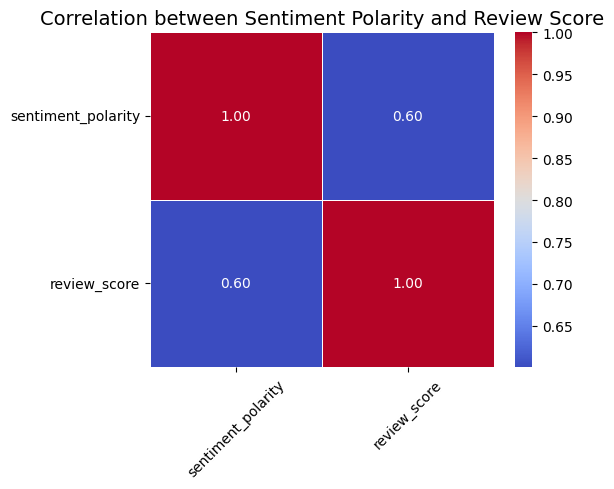

In [8]:
df = pd.read_csv('/content/your_file_with_vader_sentiment.csv',
                 parse_dates=['order_purchase_timestamp', 'order_delivered_customer_date'])

numerical_cols = df[['sentiment_polarity', 'review_score']]

correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Sentiment Polarity and Review Score', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Correlation Delivery days vs sentiment polarity

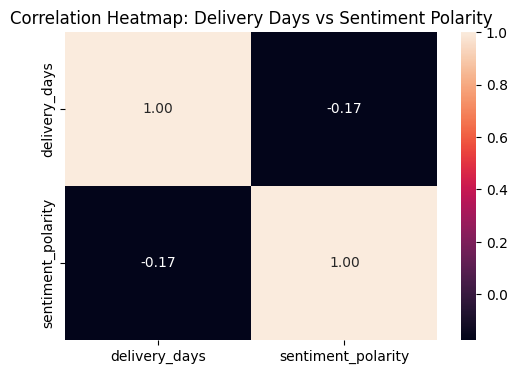

In [11]:
df['delivery_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days


plt.figure(figsize=(6, 4))
correlation_data = df[['delivery_days', 'sentiment_polarity']].corr()
sns.heatmap(correlation_data, annot=True, fmt='.2f')
plt.title('Correlation Heatmap: Delivery Days vs Sentiment Polarity')
plt.show()

Correlation matrix of all numerical features

Correlation Matrix:

                       price  payment_value  review_score  sentiment_polarity
price               1.000000       0.645355      0.020854            0.026008
payment_value       0.645355       1.000000     -0.109847           -0.062813
review_score        0.020854      -0.109847      1.000000            0.600639
sentiment_polarity  0.026008      -0.062813      0.600639            1.000000


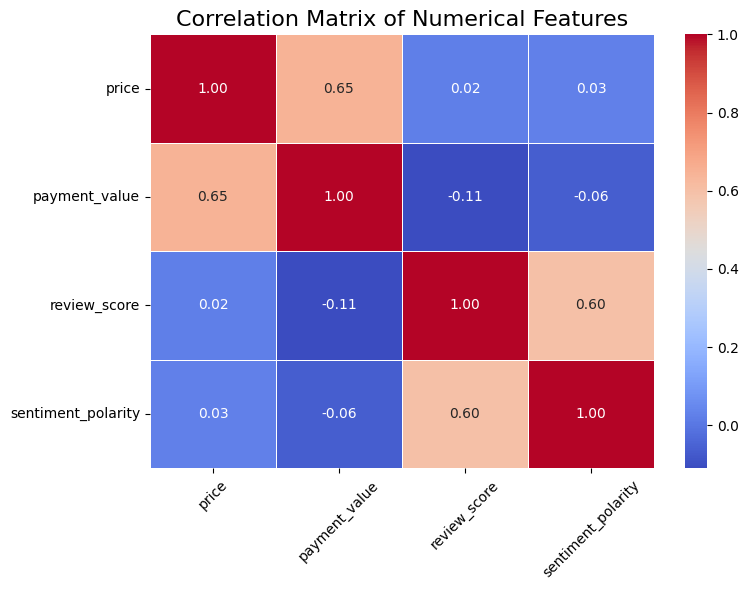

In [ ]:

numerical_cols = df[['price', 'payment_value', 'review_score', 'sentiment_polarity']]

correlation_matrix = numerical_cols.corr()

print("Correlation Matrix:\n")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Sentiment Polarity Distribution by Payment Types

<ipython-input-13-0577b193c32d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="payment_type", y="sentiment_polarity", data=df, palette="Set2")


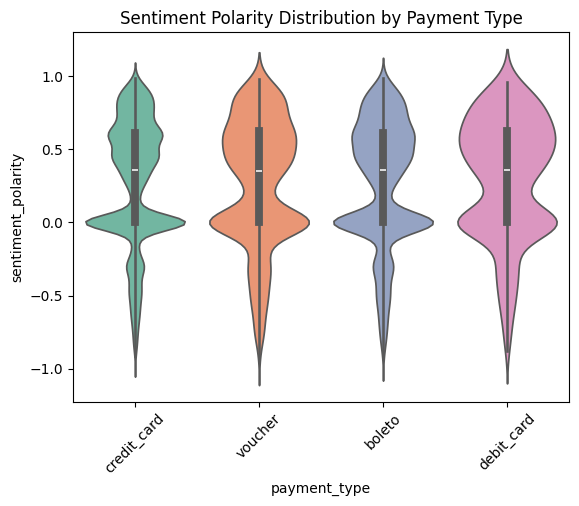

In [13]:
sns.violinplot(x="payment_type", y="sentiment_polarity", data=df, palette="Set2")
plt.title("Sentiment Polarity Distribution by Payment Type")
plt.xticks(rotation=45)
plt.show()

## Phase 5: Time Series Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('File_with_vader_sentiment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47211 entries, 0 to 47210
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     47211 non-null  int64  
 1   customer_city                  47211 non-null  object 
 2   seller_city                    47211 non-null  object 
 3   seller_state                   47211 non-null  object 
 4   product_category_name_english  47211 non-null  object 
 5   price                          47211 non-null  float64
 6   payment_value                  47211 non-null  float64
 7   payment_type                   47211 non-null  object 
 8   order_status                   47211 non-null  object 
 9   order_purchase_timestamp       47211 non-null  object 
 10  order_delivered_customer_date  47211 non-null  object 
 11  review_score                   47211 non-null  float64
 12  review_comment_message         47211 non-null 

**Monthly Sales Pattern**

<ipython-input-4-4e032190d840>:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


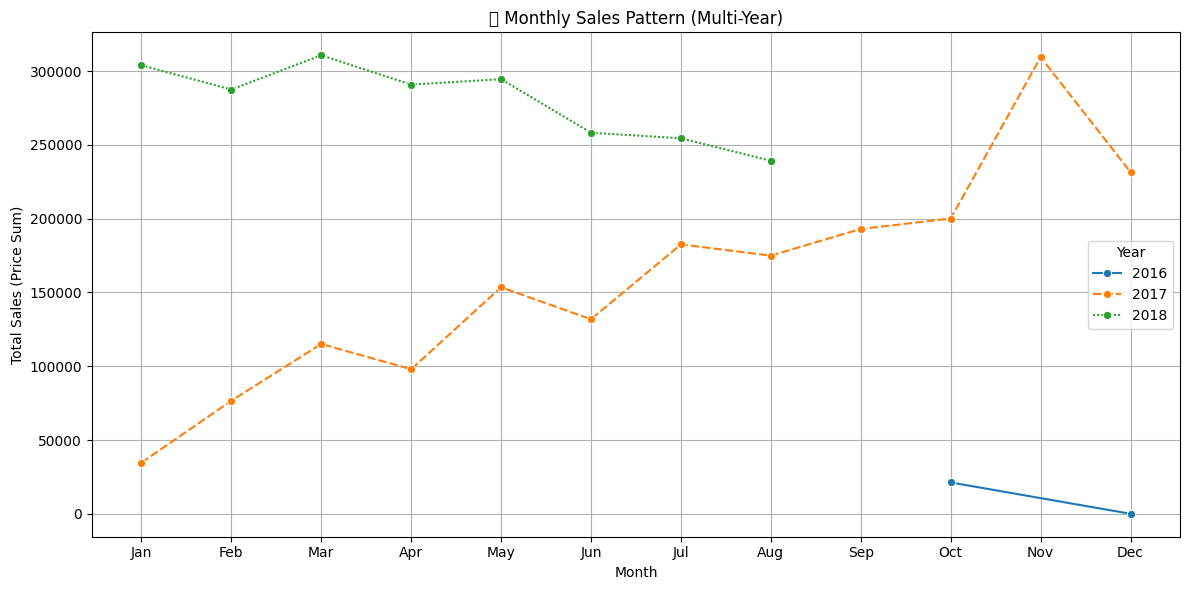

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['Year'] = df['order_purchase_timestamp'].dt.year
df['Month'] = df['order_purchase_timestamp'].dt.month
monthly_sales = df.groupby(['Year', 'Month'])['price'].sum().reset_index()
monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='price')
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_pivot, marker='o')
plt.title('📈 Monthly Sales Pattern (Multi-Year)')
plt.xlabel('Month')
plt.ylabel('Total Sales (Price Sum)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

 **Key Insights from the Monthly Sales Pattern**

- **2016**: Only includes data from October to December with very low sales — likely partial data.
- **2017**: Strong upward trend. Sales peak in **November (~310,000)**, likely due to holiday season. Slight dip in December.
- **2018**: Begins high (**~300,000 in January**) but shows a **steady decline** throughout the year. No significant holiday spike.

---

 **Summary**

- **November** is a key sales month, especially in 2017.
- **2018 year-end sales dropped**, breaking the previous seasonal pattern.
- Recommend focusing on **holiday campaigns** and **post-holiday promotions** to maximize sales.


**Weekday vs Weekend Sales Analysis**

<ipython-input-7-d0fc3d57c53f>:22: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


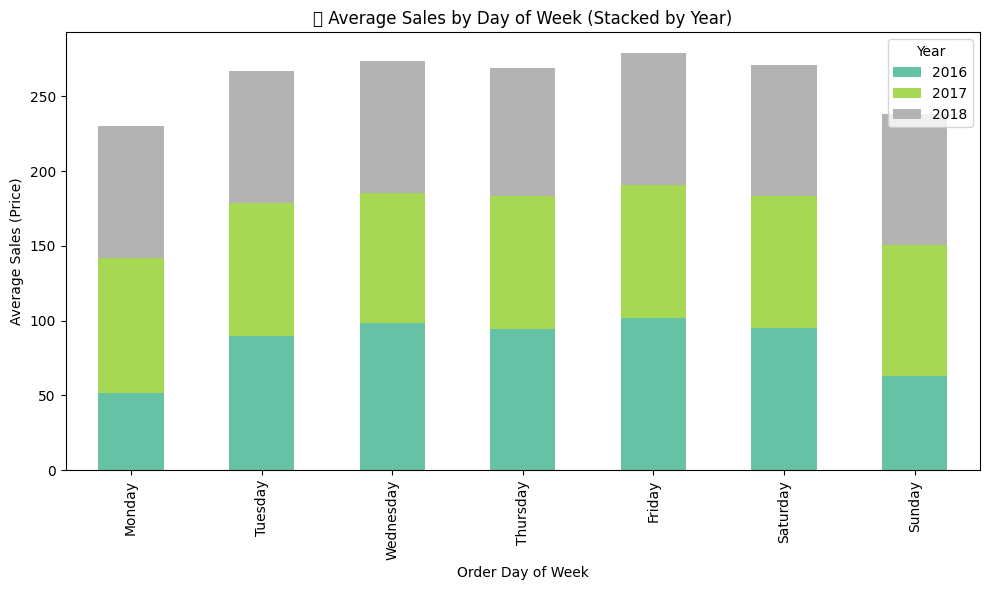

In [ ]:
df['Year'] = df['order_purchase_timestamp'].dt.year
df['DayOfWeek'] = df['order_purchase_timestamp'].dt.day_name()
avg_sales = df.groupby(['DayOfWeek', 'Year'])['price'].mean().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_sales['DayOfWeek'] = pd.Categorical(avg_sales['DayOfWeek'], categories=days_order, ordered=True)
avg_sales = avg_sales.sort_values(['DayOfWeek', 'Year'])
pivot_df = avg_sales.pivot(index='DayOfWeek', columns='Year', values='price')
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("📅 Average Sales by Day of Week (Stacked by Year)")
plt.xlabel("Order Day of Week")
plt.ylabel("Average Sales (Price)")
plt.legend(title='Year')
plt.tight_layout()
plt.show()


**Insights:**
Sales are evenly distributed across weekdays, with a slight peak on Fridays, indicating strong end-of-week shopping behavior.

* Saturday also shows relatively high sales, reflecting active weekend shopping,
especially from 2018 data.

* Monday and Sunday record slightly lower average sales compared to midweek and Friday.

* There is no extreme dip on any specific day, suggesting consistent engagement throughout the week.

**Sales vs Sentiment Over Time**

<ipython-input-8-1f9cc4d0313e>:27: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


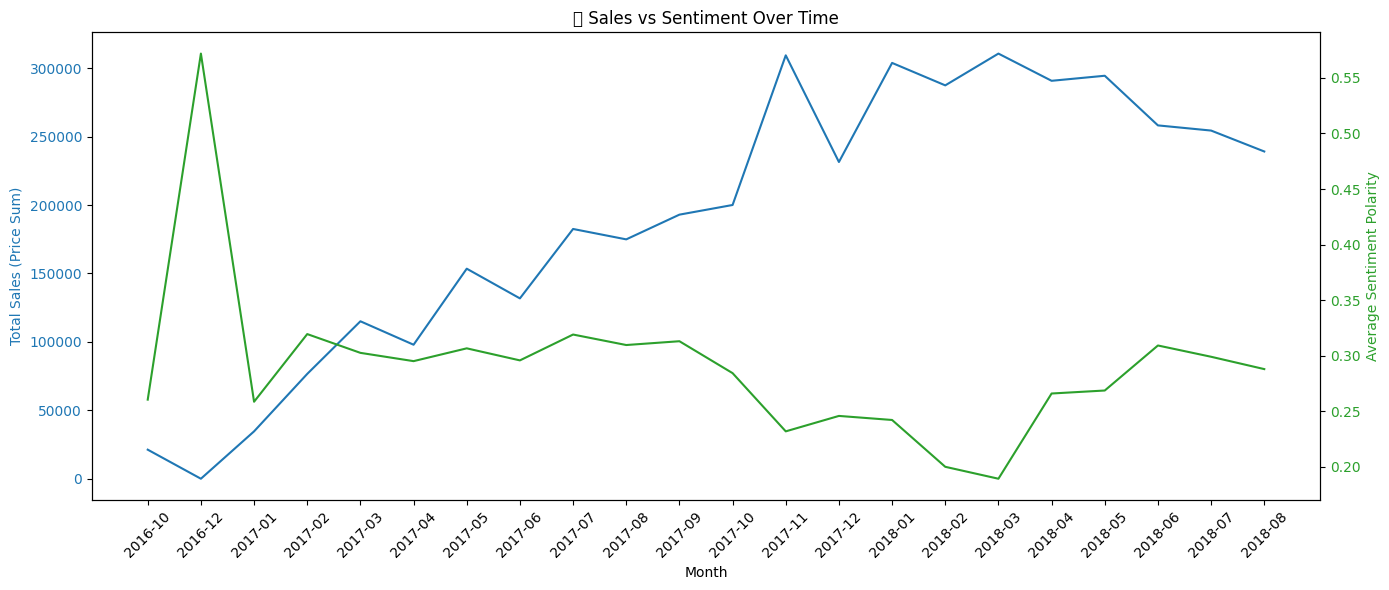

In [ ]:
df['YearMonth'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
monthly_data = df.groupby('YearMonth').agg({
    'price': 'sum',
    'sentiment_polarity': 'mean'
}).reset_index()
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales (Price Sum)', color='tab:blue')
ax1.plot(monthly_data['YearMonth'], monthly_data['price'], color='tab:blue', label='Total Sales')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=45)
ax2 = ax1.twinx()
ax2.set_ylabel('Average Sentiment Polarity', color='tab:green')
ax2.plot(monthly_data['YearMonth'], monthly_data['sentiment_polarity'], color='tab:green', label='Sentiment Polarity')
ax2.tick_params(axis='y', labelcolor='tab:green')
plt.title("💬 Sales vs Sentiment Over Time")
fig.tight_layout()
plt.show()


**Graph Type:**  Dual-axis line chart  
- **Left Y-axis:** Total Sales (Price Sum) – *Blue Line*  
- **Right Y-axis:** Average Sentiment Polarity – *Green Line*

**Insights:**

- **Positive Start in Late 2016:** A sudden spike in sentiment in December 2016 may reflect holiday season satisfaction or an initial influx of positive reviews.
- **Growth Period (2017):**
  - Sales consistently **increased throughout 2017**, peaking around November.
  - Sentiment remained moderately stable but slightly declined after Q1.
- **Peak vs Sentiment Drop (Late 2017):**
  - Despite **high sales in Nov–Dec 2017**, sentiment polarity noticeably dropped — possibly due to order delays or holiday rush dissatisfaction.
- **2018 Trends:**
  - Sales remained strong early in the year but gradually declined post-Q2.
  - Sentiment also stayed low in early 2018, showing a **possible link between customer satisfaction and declining revenue**.
  - A slight recovery in sentiment mid-2018 did not correspond with a similar sales rebound.

---

**Summary:**
> **Sales and sentiment do not always move together**, but a **drop in sentiment often precedes or coincides with sales decline**. This implies that maintaining positive customer experience is crucial for sustaining sales momentum.



**Product-wise Sales Trends**

<ipython-input-12-84dd5df98267>:26: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


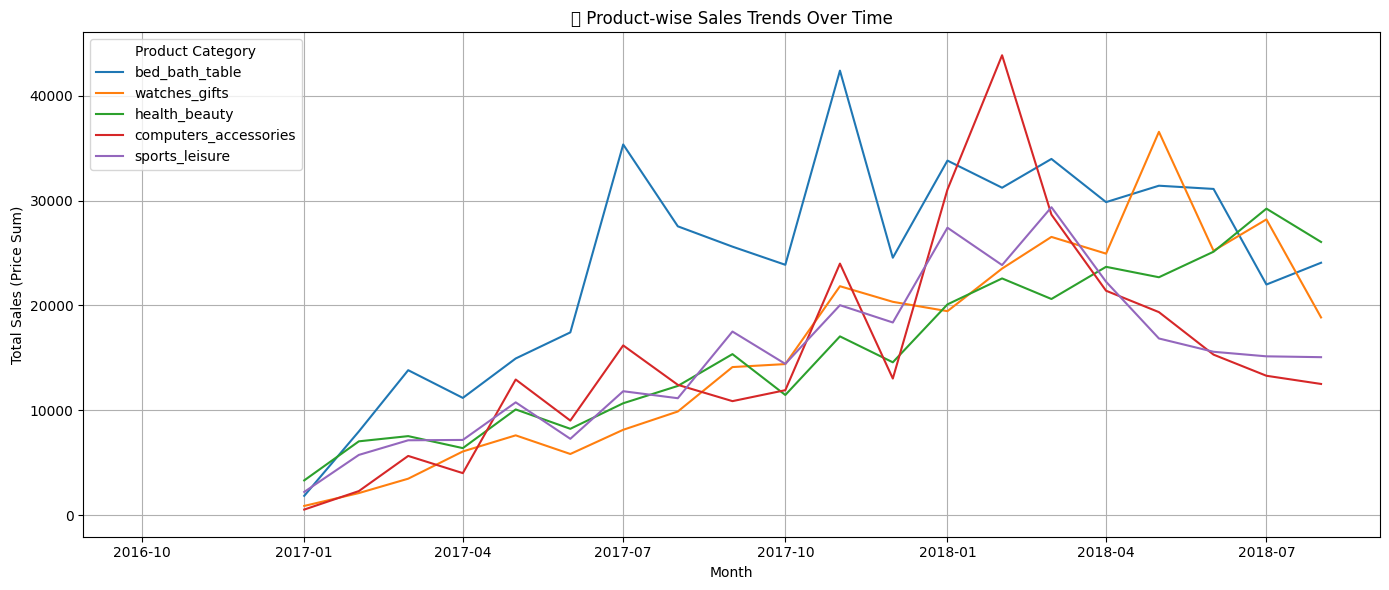

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['Month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = df.groupby(['Month', 'product_category_name_english'])['price'].sum().reset_index()
sales_pivot = monthly_sales.pivot(index='Month', columns='product_category_name_english', values='price')
top_categories = df.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(5).index
sales_pivot = sales_pivot[top_categories]
plt.figure(figsize=(14, 6))
for category in sales_pivot.columns:
    plt.plot(sales_pivot.index.to_timestamp(), sales_pivot[category], label=category)
plt.title("🛍 Product-wise Sales Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales (Price Sum)")
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()
plt.show()


**Insights**

* **`bed_bath_table`** consistently showed strong sales across the timeline, with a sharp peak around **November–December 2017**. This may reflect seasonal demand during holidays.
* **`computers_accessories`** experienced a dramatic surge in **early 2018**, especially in **February**, marking the **highest spike** among all categories. This may be linked to promotional campaigns or new product launches.
* **`watches_gifts`** followed a steady growth trend, with a major **peak in May 2018**, likely reflecting gift purchases around a seasonal or celebratory period.
* **`health_beauty`** and **`sports_leisure`** showed moderate growth, with **stable yet less volatile sales trends**, indicating consistent but niche demand.
* Seasonal variations and external events seem to influence different product categories uniquely over time.

---


**Order Forecast (ARIMA Model)**

<ipython-input-6-8e4428bf2d3a>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = df['price'].resample('M').count()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-6-8e4428bf2d3a>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_orders.index[-1] + pd.offsets.MonthBegin(1),


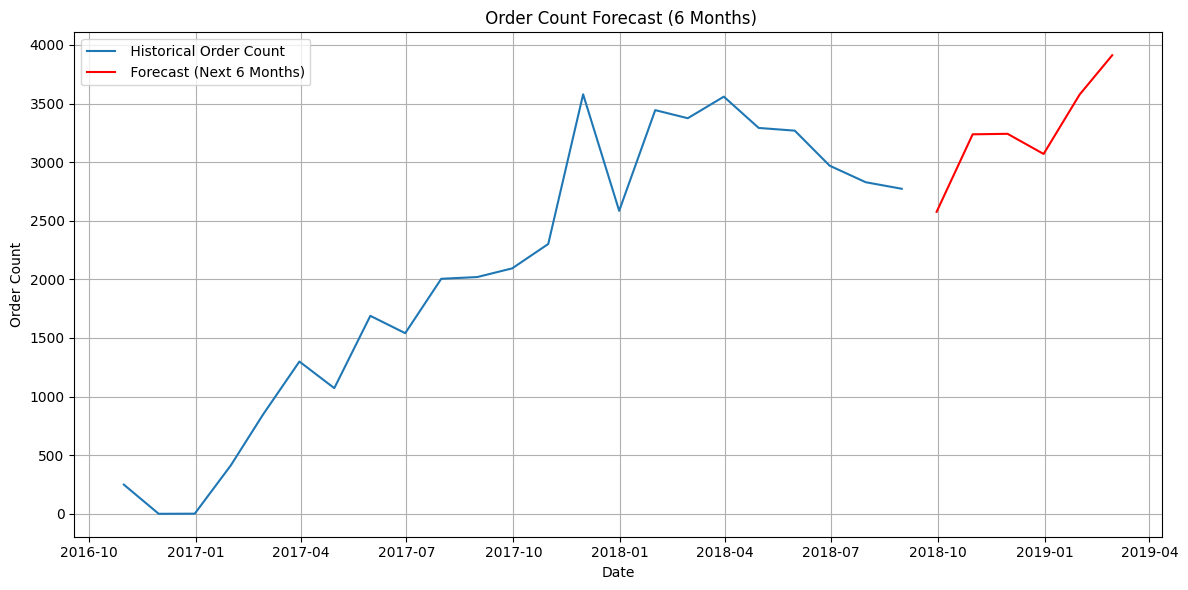

 Forecasted Order Count for Next 6 Months:
2018-09-30    2577.0
2018-10-31    3238.0
2018-11-30    3242.0
2018-12-31    3070.0
2019-01-31    3577.0
2019-02-28    3912.0
Freq: ME, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
df = pd.read_csv('File_with_vader_sentiment.csv')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df.set_index('order_purchase_timestamp', inplace=True)
monthly_orders = df['price'].resample('M').count()
monthly_orders = monthly_orders.rename('order_count')
model = SARIMAX(monthly_orders, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima_result = model.fit(disp=False)
forecast_steps = 6
forecast = arima_result.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_orders.index[-1] + pd.offsets.MonthBegin(1),
                               periods=forecast_steps, freq='M')
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders, label=' Historical Order Count')
plt.plot(forecast_index, forecast, label=' Forecast (Next 6 Months)', color='red')
plt.title(' Order Count Forecast (6 Months)')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(' Forecasted Order Count for Next 6 Months:')
print(pd.Series(forecast.values, index=forecast_index).round(0))

 **Insights**

- Using an ARIMA model with seasonality, we projected the number of orders for the next 6 months.
- The forecast line (in red) **extends the trend based on historical patterns**, including any detected seasonality.
- The model suggests a **continued growth or stabilization** depending on prior trends, helping the business **anticipate demand and plan resources**.
- This type of forecast is essential for **inventory management, logistics planning, and marketing efforts** ahead of time.

 Model used: **SARIMA(1, 1, 1)(1, 1, 1, 12)**  
 Forecast Horizon: **6 months ahead**


## Phase 6: Modelling

In [1]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn unidecode


In [2]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from unidecode import unidecode
from nltk.stem.porter import PorterStemmer

In [3]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
# Download the missing punkt_tab resource
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# Visualizations (you can replace these functions with your own as needed)
def visualize(n):
    print(f"Visualizing Review {n}")

def model(text, val):
    print(f"Model output for Review {val}: {text}")

# Example review display
visualize(1)
model("text_review_1", 4)
visualize(2)
model("text_review_2", 4)
visualize(3)
model("text_review_3", 4)
visualize(4)
model("text_review_4", 4)
visualize(5)
model("text_review_5", 4)

Visualizing Review 1
Model output for Review 4: text_review_1
Visualizing Review 2
Model output for Review 4: text_review_2
Visualizing Review 3
Model output for Review 4: text_review_3
Visualizing Review 4
Model output for Review 4: text_review_4
Visualizing Review 5
Model output for Review 4: text_review_5


In [5]:
# Load your dataset (make sure the path is correct)
olist_order_reviews = pd.read_csv("/content/File_with_vader_sentiment.csv")

In [6]:
# Data Cleaning
stop = set(stopwords.words('english'))  # adjust language if needed
stemmer = PorterStemmer()

In [7]:
# Remove numbers
olist_order_reviews["review_comment_message"] = olist_order_reviews["review_comment_message"].astype(str)
olist_order_reviews["review_comment_message"] = olist_order_reviews["review_comment_message"].str.replace('\d+', ' ', regex=True)


In [8]:
# Lowercase
olist_order_reviews["review_comment_message"] = olist_order_reviews["review_comment_message"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [9]:
# Remove punctuation
olist_order_reviews["review_comment_message"] = olist_order_reviews["review_comment_message"].str.replace(r'[^\w\s]', ' ', regex=True)


In [10]:
# Remove stopwords
olist_order_reviews["review_comment_message"] = olist_order_reviews["review_comment_message"].apply(lambda x: " ".join(word for word in x.split() if word not in stop))


In [11]:
# Remove accentuation
olist_order_reviews["review_comment_message"] = olist_order_reviews["review_comment_message"].apply(unidecode)


In [12]:
# Tokenization
olist_order_reviews["review_comment_message"] = olist_order_reviews.apply(lambda row: word_tokenize(row['review_comment_message']), axis=1)


In [13]:
# Stemming
olist_order_reviews["review_comment_message"] = olist_order_reviews["review_comment_message"].apply(lambda x: " ".join([stemmer.stem(word) for word in x]))


In [14]:
# Add word count
olist_order_reviews["word_count_new"] = olist_order_reviews["review_comment_message"].apply(lambda x: len(x.split()))


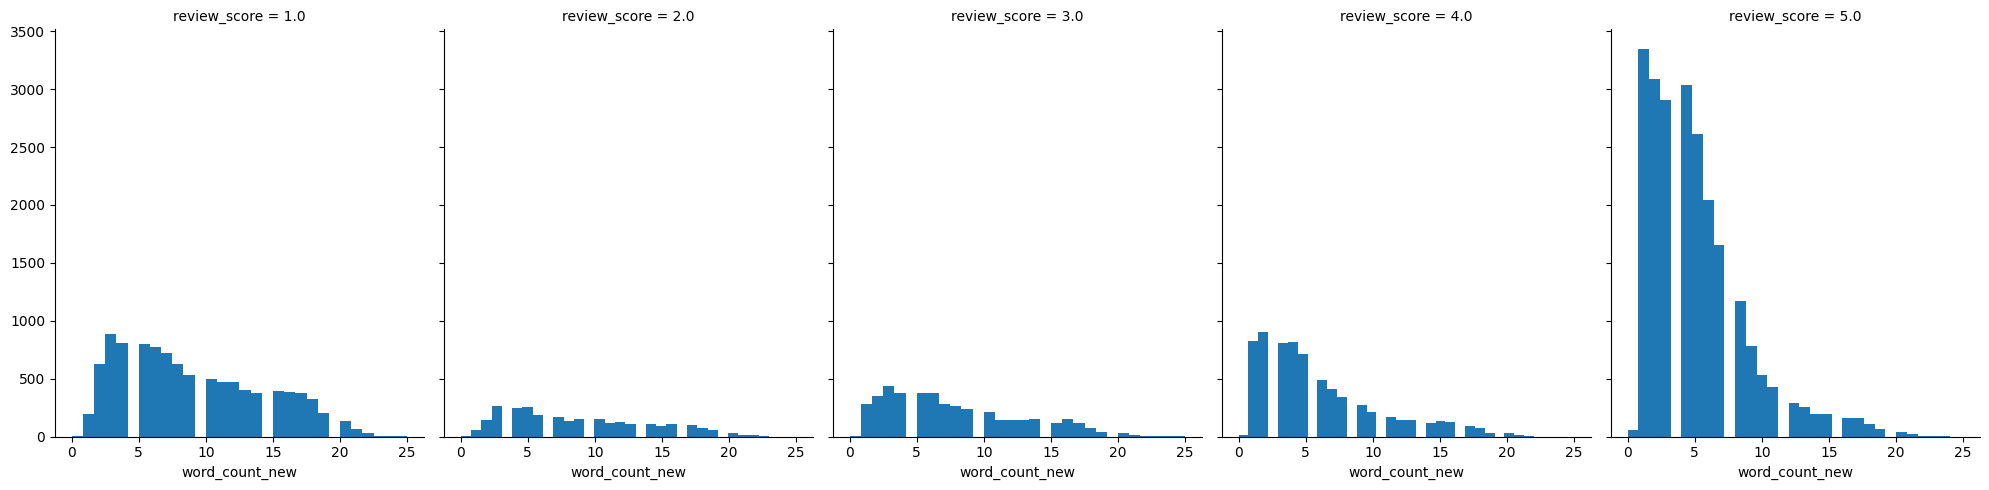

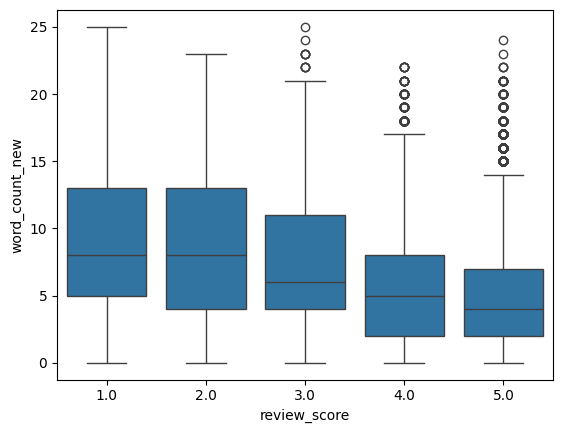

In [15]:
# Visualization: Histogram and Boxplot
g = sns.FacetGrid(data=olist_order_reviews, col='review_score', height=5, aspect=0.8)
g.map(plt.hist, 'word_count_new', bins=30)
plt.show()

sns.boxplot(x='review_score', y='word_count_new', data=olist_order_reviews)
plt.show()

In [16]:
# Model Building
order_training = olist_order_reviews.copy()
order_training['review_score'] = order_training['review_score'].replace({2: 1, 3: 1, 4: 5})
order_training = order_training[order_training['review_score'].isin([1, 5])]
order_training = order_training[['review_comment_message', 'review_score']]


In [17]:
# Count Vectorization
cv = CountVectorizer()
X_count = cv.fit_transform(order_training["review_comment_message"]).toarray()
y_count = order_training["review_score"]


PCA Explained Variance Ratio (Count): [0.05460422 0.03529897]


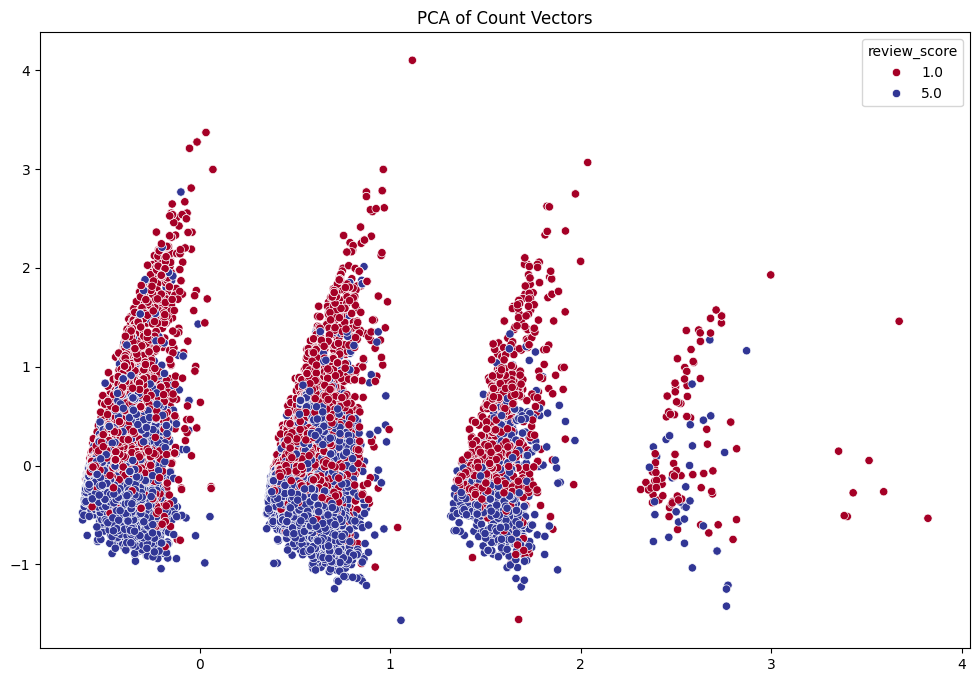

In [18]:
# PCA for visualization
pca = PCA(n_components=2)
X_count_pca = pca.fit_transform(X_count)
print("PCA Explained Variance Ratio (Count):", pca.explained_variance_ratio_)

plt.figure(figsize=(12,8))
sns.scatterplot(x=X_count_pca[:,0], y=X_count_pca[:,1], hue=y_count, palette='RdYlBu', legend="full")
plt.title("PCA of Count Vectors")
plt.show()


In [19]:
# Logistic Regression - Count Vectorizer
X_train, X_test, y_train, y_test = train_test_split(X_count, y_count, test_size=0.25, random_state=42)
logreg_vector = LogisticRegression()
logreg_vector.fit(X_train, y_train)
y_pred = logreg_vector.predict(X_test)
print("Count Vector Accuracy:", logreg_vector.score(X_test, y_test))


Count Vector Accuracy: 0.8840125391849529


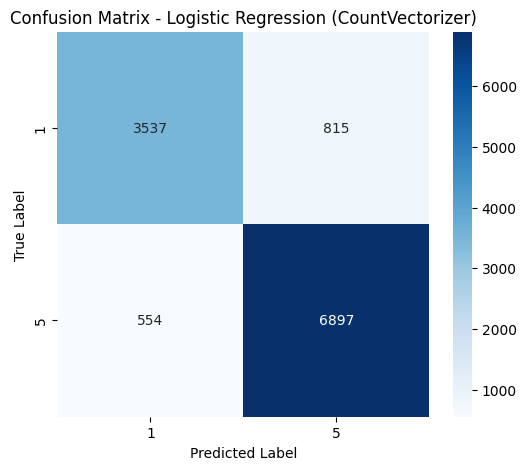

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 5], yticklabels=[1, 5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (CountVectorizer)")
plt.show()


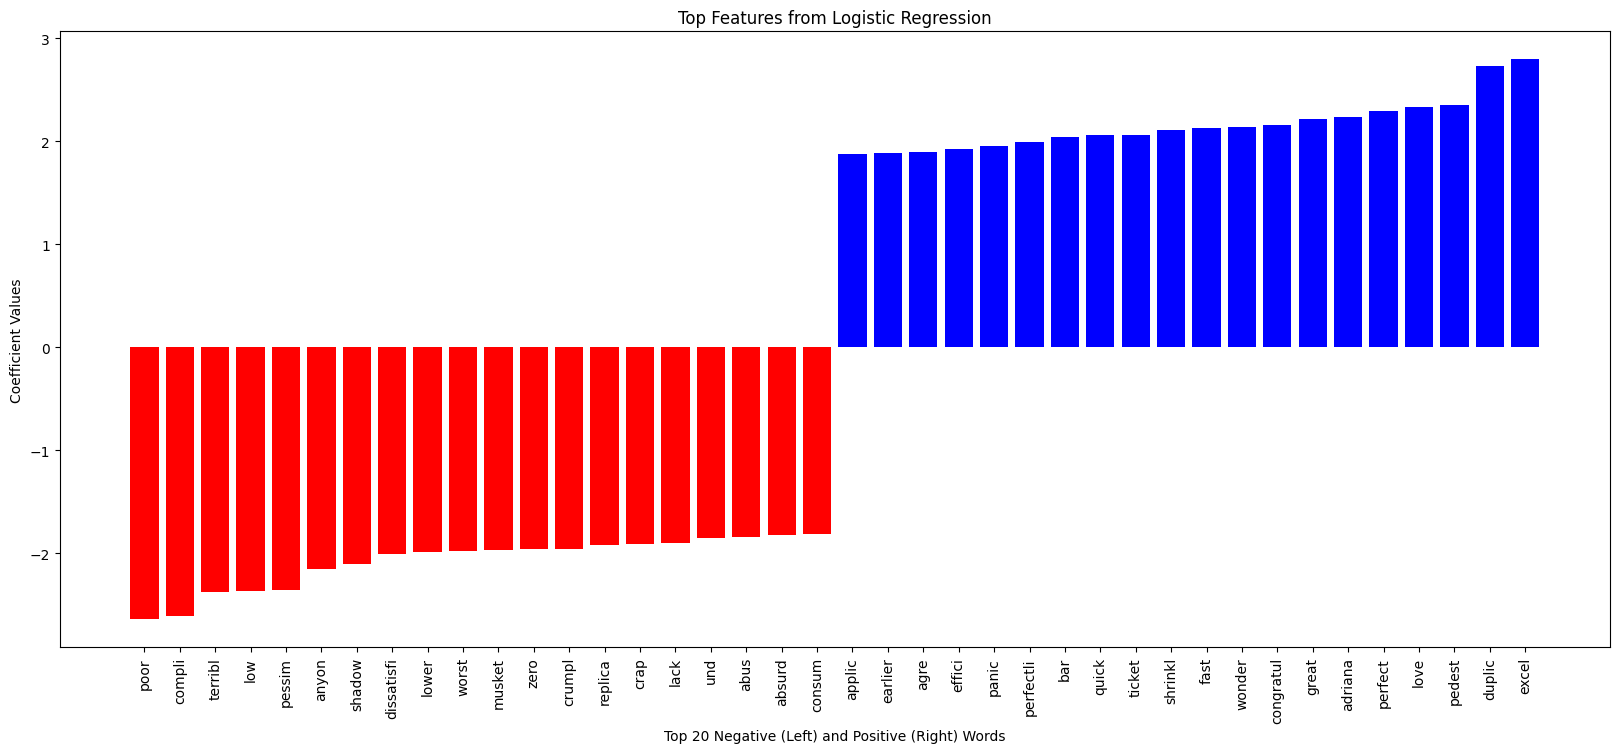

In [21]:
# Feature Importance Plot
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

    plt.figure(figsize=(20, 8))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90)
    plt.xlabel("Top 20 Negative (Left) and Positive (Right) Words")
    plt.ylabel("Coefficient Values")
    plt.title("Top Features from Logistic Regression")
    plt.show()

plot_coefficients(logreg_vector, cv.get_feature_names_out())

In [22]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(order_training["review_comment_message"]).todense()


In [23]:

# Convert the numpy.matrix to a numpy.ndarray
X_tfidf = np.asarray(X_tfidf)


PCA Explained Variance Ratio (TF-IDF): [0.04175333 0.02788974]


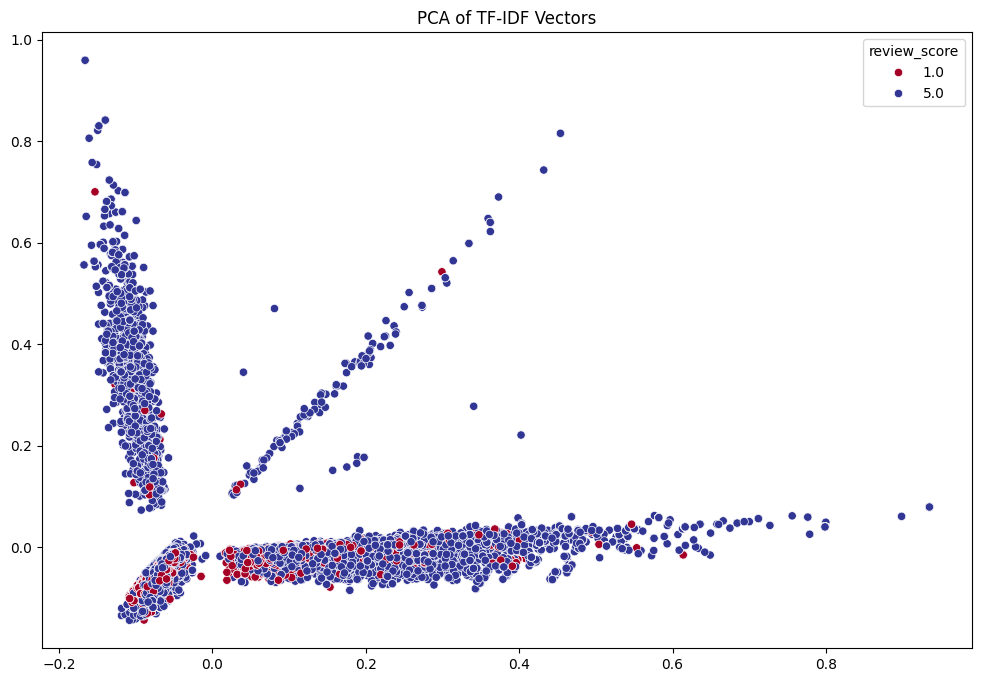

In [24]:


# PCA Visualization for TF-IDF
pca = PCA(n_components=2)
X_tfidf_pca = pca.fit_transform(X_tfidf)
print("PCA Explained Variance Ratio (TF-IDF):", pca.explained_variance_ratio_)

plt.figure(figsize=(12,8))
sns.scatterplot(x=X_tfidf_pca[:,0], y=X_tfidf_pca[:,1], hue=y_count, palette='RdYlBu', legend="full")
plt.title("PCA of TF-IDF Vectors")
plt.show()

In [25]:
# Logistic Regression - TF-IDF
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_count, test_size=0.25, random_state=42)
logreg_tfidf = LogisticRegression()
logreg_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)
print("TF-IDF Accuracy:", logreg_tfidf.score(X_test_tfidf, y_test_tfidf))


TF-IDF Accuracy: 0.8855375751927476


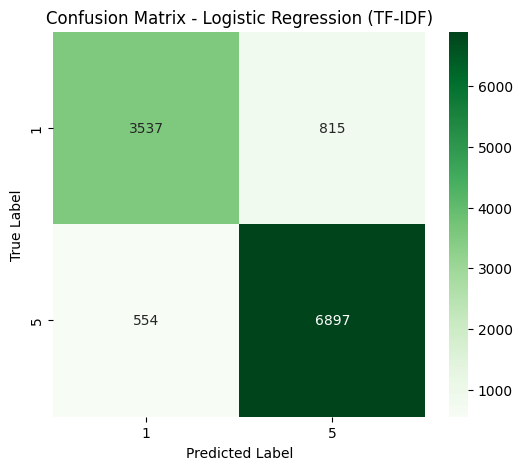

In [26]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=[1, 5], yticklabels=[1, 5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (TF-IDF)")
plt.show()



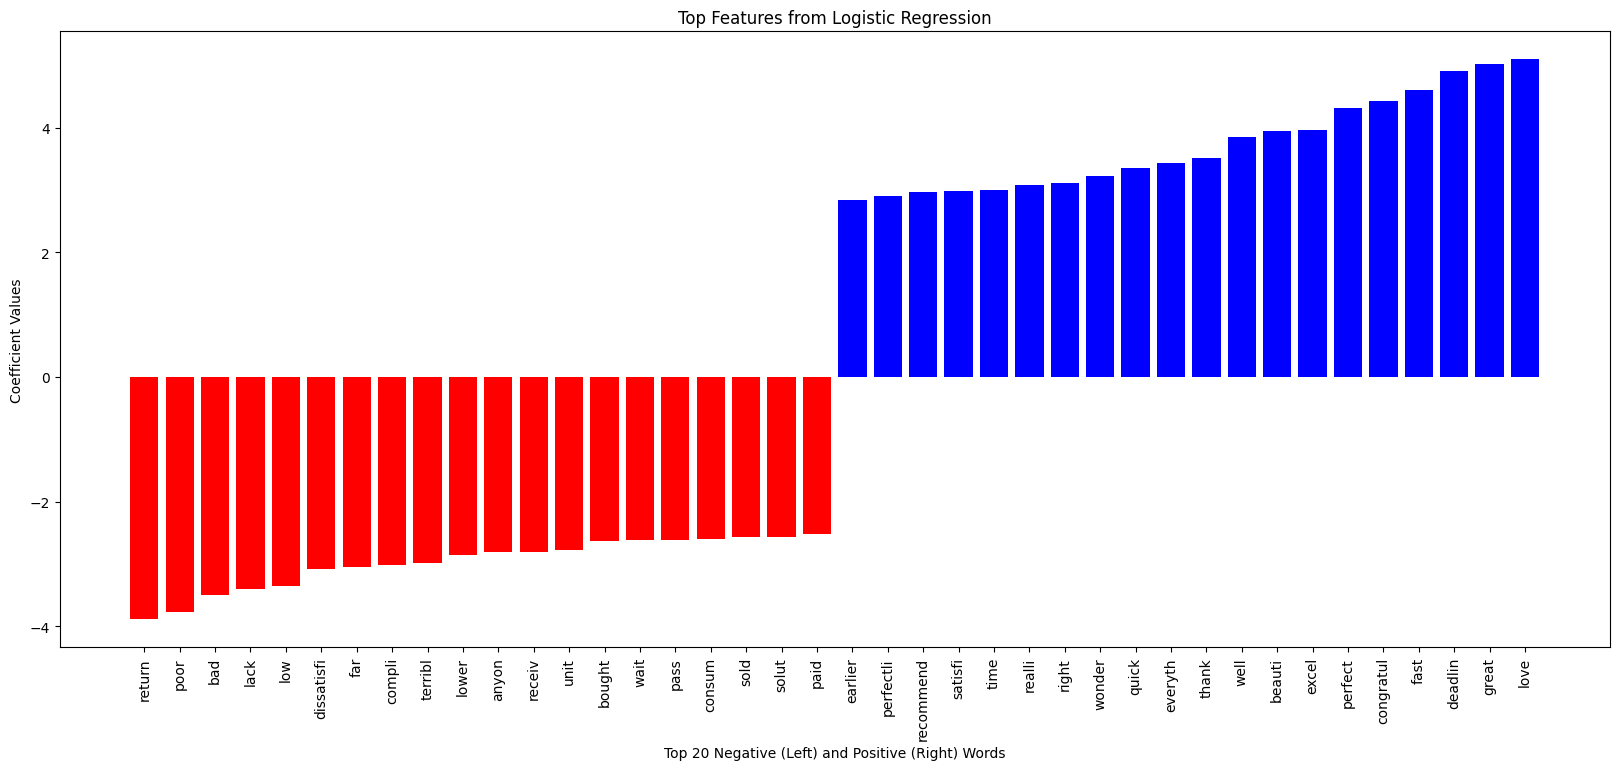

In [27]:
# Plot coefficients for TF-IDF model
plot_coefficients(logreg_tfidf, vectorizer.get_feature_names_out())

Logistic Regression (TF-IDF) Classification Report:
              precision    recall  f1-score   support

         1.0       0.85      0.84      0.84      4352
         5.0       0.91      0.91      0.91      7451

    accuracy                           0.89     11803
   macro avg       0.88      0.88      0.88     11803
weighted avg       0.89      0.89      0.89     11803



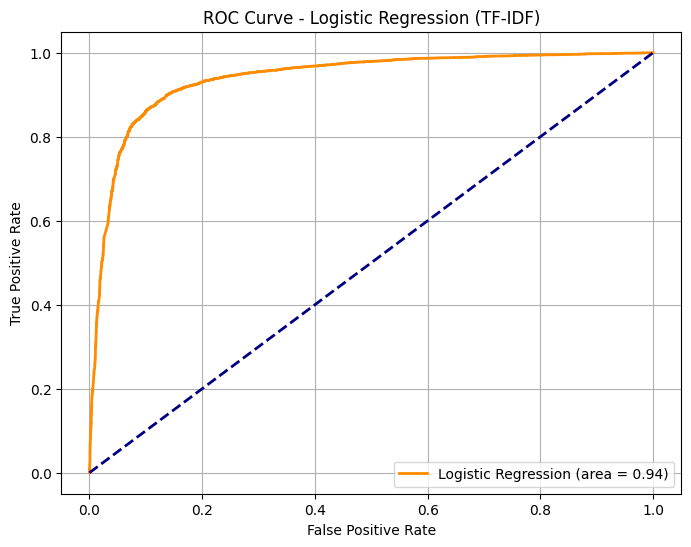

In [28]:
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# -------------------------------
# 1. Classification Report - Logistic Regression (TF-IDF)
# -------------------------------
print("Logistic Regression (TF-IDF) Classification Report:")
print(classification_report(y_test_tfidf, y_pred_tfidf))

# -------------------------------
# 2. ROC Curve - Logistic Regression (TF-IDF)
# -------------------------------
fpr, tpr, _ = roc_curve(y_test_tfidf, logreg_tfidf.predict_proba(X_test_tfidf)[:, 1], pos_label=5)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (TF-IDF)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

         1.0       0.89      0.87      0.88      4352
         5.0       0.92      0.93      0.93      7451

    accuracy                           0.91     11803
   macro avg       0.90      0.90      0.90     11803
weighted avg       0.91      0.91      0.91     11803



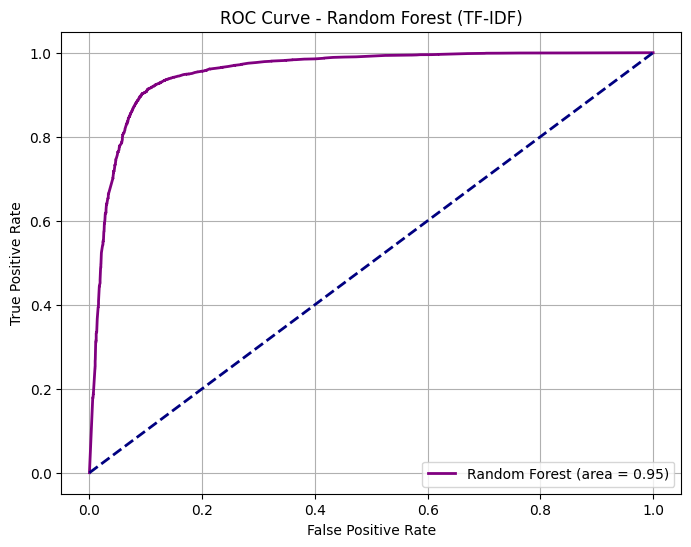

In [29]:
# -------------------------------
# 3. Random Forest Classifier
# -------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train_tfidf)
y_pred_rf = rf_model.predict(X_test_tfidf)

print("Random Forest Classification Report:")
print(classification_report(y_test_tfidf, y_pred_rf))

# ROC Curve - Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_tfidf, rf_model.predict_proba(X_test_tfidf)[:, 1], pos_label=5)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (TF-IDF)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Import Libraries

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

Loading of CLeaned Data

In [11]:

df = pd.read_csv('/content/preprocessedFinal.csv')
df.head()

Unnamed: 0            customer_city     seller_city seller_state  \
0           0                sao paulo            maua           SP   
1           1                sao paulo            maua           SP   
2           2                sao paulo            maua           SP   
3           3                barreiras  belo horizonte           SP   
4           5  sao goncalo do amarante  belo horizonte           MG   

  product_category_name_english  price  payment_value payment_type  \
0                    housewares    9.5            9.5  credit_card   
1                    housewares    9.5            9.5      voucher   
2                    housewares    9.5            9.5      voucher   
3                     perfumery    9.5            9.5       boleto   
4                      pet_shop    9.5            9.5  credit_card   

  order_status order_purchase_timestamp order_delivered_customer_date  \
0    delivered          10/2/2017 10:56           2017-10-10 21:25:00   
1    delivered          10/2/2017 10:56           2017-10-10 21:25:00   
2    delivered          10/2/2017 10:56           2017-10-10 21:25:00   
3    delivered          7/24/2018 20:41           2018-08-07 15:27:00   
4    delivered         11/18/2017 19:28           2017-12-02 00:28:00   

   review_score                             review_comment_message  \
0           4.0  I haven't tested the product yet, but it came ...   
1           4.0  I haven't tested the product yet, but it came ...   
2           4.0  I haven't tested the product yet, but it came ...   
3           4.0                                 Very good product.   
4           5.0  The product was exactly what I expected and wa...   

  review_creation_date  
0      10/11/2017 0:00  
1      10/11/2017 0:00  
2      10/11/2017 0:00  
3        8/8/2018 0:00  
4       12/3/2017 0:00

Drop columns with constant values or irrelevant for regression

In [12]:

df = df.drop(columns=[
    'Unnamed: 0', 'price', 'payment_value', 'order_status',
    'order_purchase_timestamp', 'order_delivered_customer_date',
    'review_creation_date', 'review_comment_message'
])

Setting of Target Variable and One-hot encode the categorical features

In [13]:
target = 'review_score'

print("Original Columns (Before Encoding):")
print(df.columns.tolist())

df_features = df.drop(columns=[target])


df_encoded = pd.get_dummies(df_features, drop_first=True)

print("\nEncoded Columns (After One-Hot Encoding):")
print(df_encoded.columns.tolist())


X = df_encoded
y = df[target]


Original Columns (Before Encoding):
['customer_city', 'seller_city', 'seller_state', 'product_category_name_english', 'payment_type', 'review_score']

Encoded Columns (After One-Hot Encoding):
['customer_city_abaete', 'customer_city_abaetetuba', 'customer_city_abaiara', 'customer_city_abare', 'customer_city_abatia', 'customer_city_abelardo luz', 'customer_city_abrantes', 'customer_city_abre campo', 'customer_city_abreu e lima', 'customer_city_acailandia', 'customer_city_acarau', 'customer_city_acegua', 'customer_city_acopiara', 'customer_city_acreuna', 'customer_city_acu', 'customer_city_adamantina', 'customer_city_adolfo', 'customer_city_adustina', 'customer_city_afogados da ingazeira', 'customer_city_afonso claudio', 'customer_city_afranio', 'customer_city_agisse', 'customer_city_agronomica', 'customer_city_agua boa', 'customer_city_agua branca', 'customer_city_agua comprida', 'customer_city_agua doce do norte', 'customer_city_agua fria de goias', 'customer_city_agua limpa', 'custome

Dividing the dataset into training and testing sets using train_test_split()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("Data Split Summary:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")


Data Split Summary:
X_train shape: (38996, 3808)
X_test shape:  (9750, 3808)
y_train shape: (38996,)
y_test shape:  (9750,)


Doing Linear Regression

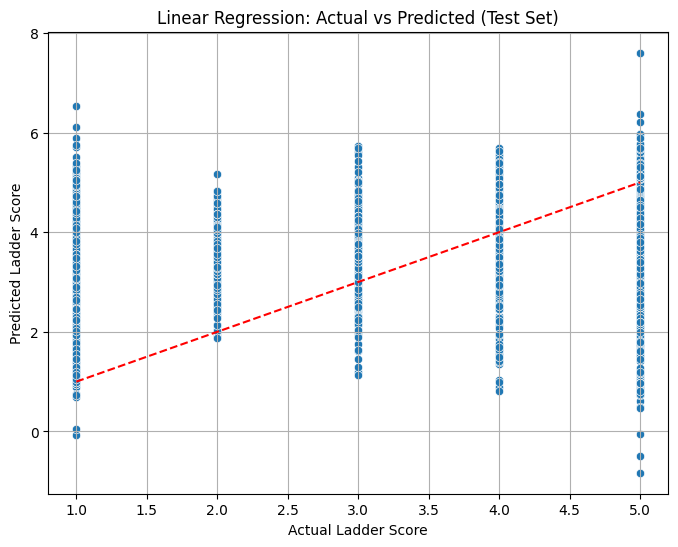

R² Score: 0.014233666474329887
MAE: 1.391835860252888


In [15]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Ladder Score")
plt.ylabel("Predicted Ladder Score")
plt.title("Linear Regression: Actual vs Predicted (Test Set)")
plt.grid(True)
plt.show()

print("R² Score:", r2_score(y_test, y_pred_linear))
print("MAE:", mean_absolute_error(y_test, y_pred_linear))

KDE plot to compare actual and predicted values

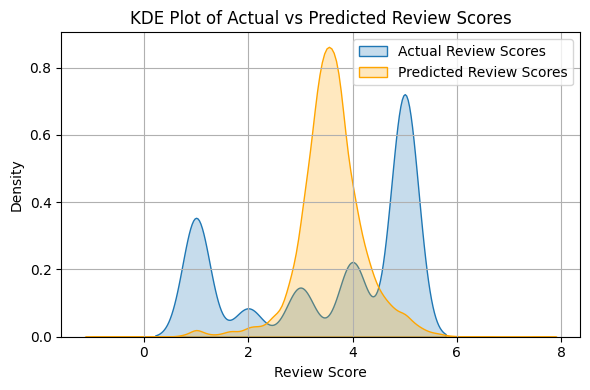

In [19]:

plt.figure(figsize=(6, 4))
sns.kdeplot(y_test, fill=True, label='Actual Review Scores')
sns.kdeplot(y_pred_linear, fill=True, label='Predicted Review Scores', color='orange')
plt.title('KDE Plot of Actual vs Predicted Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The KDE plot shows that the predicted scores align closely with the actual scores in the central region, but the predicted distribution is narrower, indicating an underestimation of variability. The predicted curve is slightly taller and narrower at the peak, suggesting minor underfitting.The predicted curve doesn't have any sudden, unusual peaks, meaning there's no serious overfitting. While the actual scores have a wider spread, particularly in lower values, the predicted scores cluster more around the mean, with the model struggling to predict extremely low scores.